# TASK: Develop a recommendation algorithm that leverages the Spotify dataset to suggest music based on user preferences and music attributes.

In [60]:
import numpy as np
import pandas as pd

## STEP 1: Data Loading and Exploration

#### Read the year dataset using pd.read_csv() and assign it to data, genre_data, year_data, and artist_data.

In [61]:
data = pd.read_csv("Final Project Datasets - Spotify\\data.csv")

In [62]:
genre_data = pd.read_csv("Final Project Datasets - Spotify\\data_by_genres.csv")

In [63]:
year_data = pd.read_csv("Final Project Datasets - Spotify\\data_by_year.csv")

In [64]:
artist_data = pd.read_csv("Final Project Datasets - Spotify\\data_by_artist.csv")

#### Display the first two rows of data, genre_data, year_data, and artist_data using head().

In [65]:
print(f"Main Data:\n{data.head(2)}")

Main Data:
   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz             0.878   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8             0.000   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   

   speechiness   tempo  
0       0.0366  80.954  
1       0.4150  60.936  


In [66]:
print(f"Genre Data:\n{genre_data.head(2)}")

Genre Data:
   mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834    0.3616 -31.514333     0.040567   75.336500   
1  0.450678          0.477762    0.1310 -16.854000     0.076817  120.285667   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  


In [67]:
print(f"Year Data:\n{year_data.head(2)}")

Year Data:
   mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878   0.20571 -17.048667     0.073662  101.531493  0.379327   
1          0.434195   0.24072 -19.275282     0.116655  100.884521  0.535549   

   popularity  key  
0    0.653333    2  
1    0.140845   10  


In [68]:
print(f"Artist Data:\n{artist_data.head(2)}")

Artist Data:
   mode  count  acousticness                           artists  danceability  \
0     1      9      0.590111  "Cats" 1981 Original London Cast      0.467222   
1     1     26      0.862538         "Cats" 1983 Broadway Cast      0.441731   

     duration_ms    energy  instrumentalness  liveness  loudness  speechiness  \
0  250318.555556  0.394003          0.011400  0.290833   -14.448     0.210389   
1  287280.000000  0.406808          0.081158  0.315215   -10.690     0.176212   

        tempo   valence  popularity  key  
0  117.518111  0.389500   38.333333    5  
1  103.044154  0.268865   30.576923    5  


#### Retrieve information about data and genre_data using info().

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [70]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


#### Create a decade column in data representing the decade of each track using apply() and a lambda function.

In [71]:
data['decade'] = data['year'].apply(lambda x: (x // 10) * 10)

In [72]:
# display the update data dataset wth the newly created column
data.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1920
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,1920


## STEP 2: DATA ANALYSIS AND VISUALISATIONS

#### Visualize the distribution of tracks across different decades using a count plot: sns.countplot(data['decade']).

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

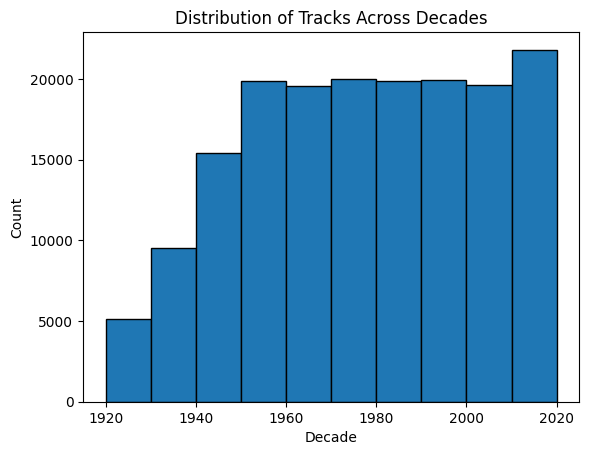

In [74]:
# Plotting the distribution of tracks across decades
plt.hist(data['decade'], bins=10, edgecolor='black')
plt.title('Distribution of Tracks Across Decades')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.show()

#### Plot the trends of various sound features (acousticness, danceability, energy, instrumentalness, liveness, valence) over decades using a line plot: px.line(year_data, x='year', y=sound_features, title='Trend of various sound features over decades').

In [75]:
# Plotting a line chart to show the trend of various sound features over the decades
import plotly.express as px

sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

fig = px.line(year_data, x='year', y=sound_features, title='Trend of various sound features over decades')
fig.show()

#### Plot the trend of loudness over decades using a line plot: px.line(year_data, x='year', y='loudness', title='Trend of loudness over decades').

In [76]:
# Plotting a line chart to show the trend of loudness over the decades
fig = px.line(year_data, x='year', y='loudness', title='Trend of loudness over decades')
fig.show()

#### Identify the top 10 genres based on popularity and plot the trends of various sound features (valence, energy, danceability, acousticness) for these genres using a grouped bar chart: px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group', title='Trend of various sound features over top 10 genres').

In [77]:
# Plotting a group bar chart to show the top 10 genre by popularity and their trends of various sound features
top10_genres = genre_data.sort_values('popularity', ascending=False).head(10)

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group', title='Trend of various sound features over top 10 genres')
fig.show()

#### Generate a word cloud of the genres present in the dataset using the WordCloud library: WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, max_words=40, min_font_size=10).generate(comment_words)

In [78]:
# Creating a word cloud to show the genres present in the Genre dataset
from wordcloud import WordCloud
from collections import Counter
import string

Song_Genres = genre_data['genres'].str.split(',').explode().str.strip().str.lower()
stopwords = set(string.punctuation)

comment_words = ' '.join(Song_Genres)

Genres_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words=40,
                min_font_size = 10).generate(comment_words)


#### Plot the word cloud of the genres: plt.imshow(wordcloud).

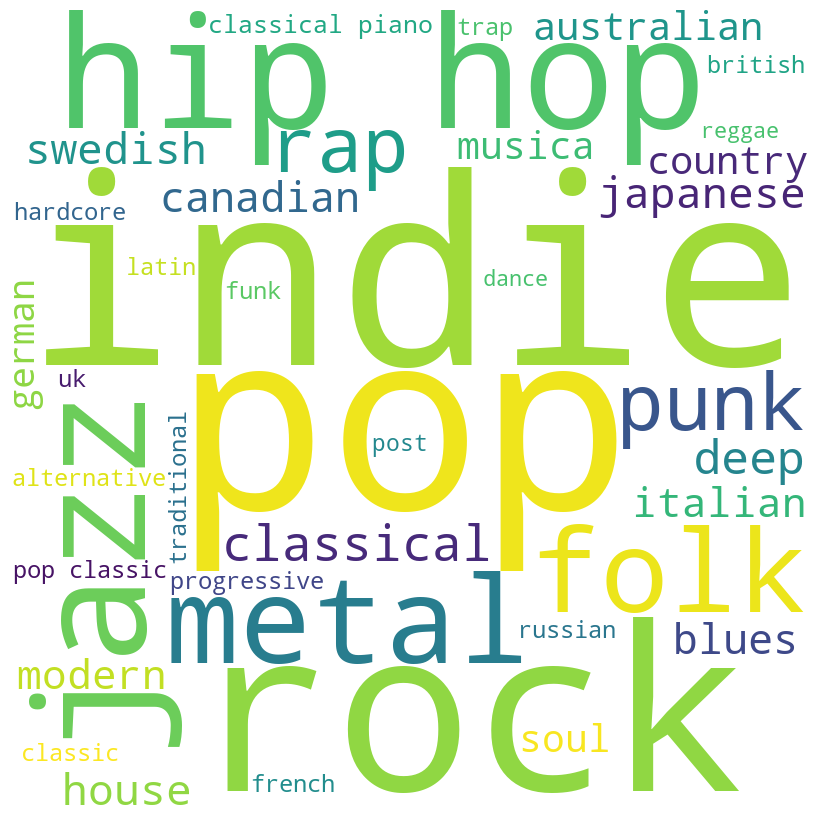

In [79]:
# Plotting a word cloud of Genres
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(Genres_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Generate a word cloud of the artists present in the dataset using the WordCloud library: WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_word_length=3, max_words=40, min_font_size=10).generate(comment_words).

In [80]:
# Creating a word cloud to show the Music Artists present in the Artist dataset
from wordcloud import WordCloud
from collections import Counter
import string

Music_Artists = artist_data['artists'].str.split(',').explode().str.strip().str.lower()
Artists_stopwords = set(string.punctuation)

Artists_comment_words = ' '.join(Music_Artists)

Artist_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = Artists_stopwords,
                min_word_length=3, 
                max_words=40,
                min_font_size = 10).generate(Artists_comment_words)

#### Plot the word cloud of the artists: plt.imshow(wordcloud).

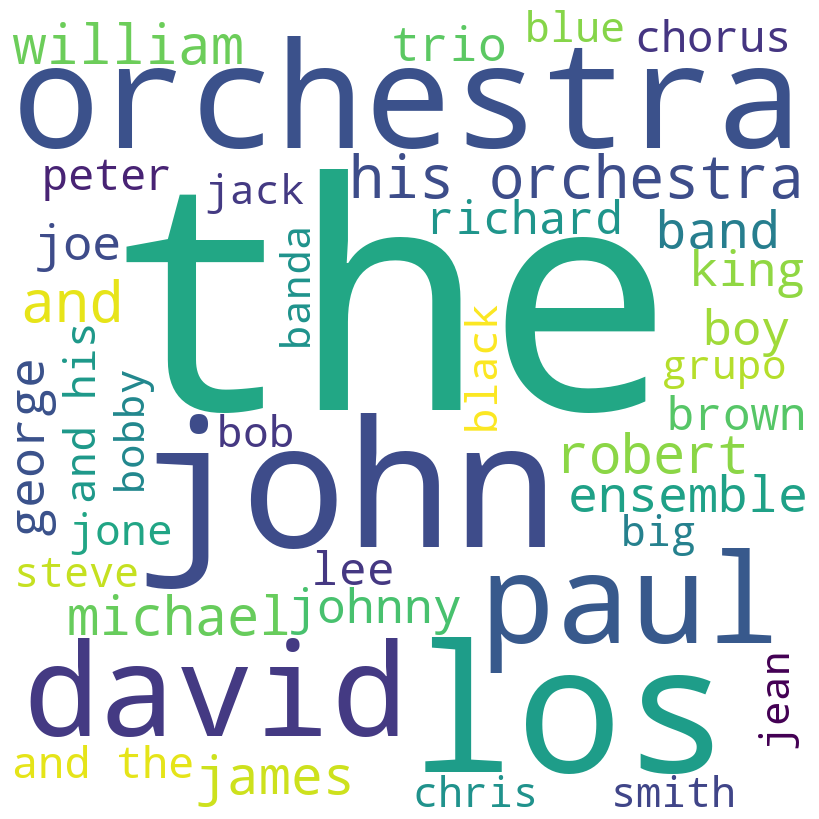

In [81]:
# Plotting a word cloud of Music Artists
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(Artist_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Identify the top 10 artists with the most songs produced and display the count and artist name: top10_most_song_produced_artists[['count','artists']].sort_values('count', ascending=False).

In [82]:
# Identifying the top 10 artists with the highest number of tracks
top10_most_song_produced_artists = data['artists'].value_counts().reset_index()
top10_most_song_produced_artists.columns = ['artists', 'count']

top10_most_song_produced_artists = top10_most_song_produced_artists.nlargest(10, 'count')

print(top10_most_song_produced_artists[['count','artists']].sort_values('count', ascending=False))

   count                 artists
0   1211    ['Эрнест Хемингуэй']
1   1068   ['Эрих Мария Ремарк']
2    942    ['Francisco Canaro']
3    630       ['Frank Sinatra']
4    628     ['Ignacio Corsini']
5    504       ['Elvis Presley']
6    484         ['Johnny Cash']
7    474           ['Bob Dylan']
8    471  ['The Rolling Stones']
9    455      ['The Beach Boys']


#### Identify the top 10 artists with the highest popularity score and display the popularity score and artist name: top10_popular_artists[['popularity','artists']].sort_values('popularity', ascending=False).

In [83]:
# Identifying the top 10 artists with the highest popularity score
top10_popular_artists = data[['artists', 'popularity']].groupby('artists')['popularity'].mean().reset_index()

top10_popular_artists = top10_popular_artists.rename(columns={'popularity': 'Popularity Rating'})

top10_popular_artists = top10_popular_artists.nlargest(10, 'Popularity Rating')

# Reorder columns and add index
top10_popular_artists = top10_popular_artists[['artists', 'Popularity Rating']].reset_index(drop=True)

# Add custom index
top10_popular_artists.index += 1

print(top10_popular_artists)

                                              artists  Popularity Rating
1                        ['Bad Bunny', 'Jhay Cortez']              100.0
2                           ['24kGoldn', 'iann dior']               99.0
3                  ['Cardi B', 'Megan Thee Stallion']               96.0
4                   ['Justin Bieber', 'benny blanco']               95.0
5                              ['Joel Corry', 'MNEK']               94.0
6   ['Sech', 'Daddy Yankee', 'J Balvin', 'ROSALÍA'...               94.0
7                               ['Drake', 'Lil Durk']               93.0
8                                     ['Ritt Momney']               93.0
9      ['J Balvin', 'Tainy', 'Dua Lipa', 'Bad Bunny']               92.0
10        ['Jay Wheeler', 'DJ Nelson', 'Myke Towers']               92.0


#### Make a conclusion about our Data

##### The Spotify dataset reveals significant insights into the evolution of music over time. Key findings include:
- A noticeable shift in sound features, such as acousticness and danceability, across decades, indicating changing musical preferences.
- Loudness has steadily increased over time, reflecting advancements in production techniques.
- The top 10 genres demonstrate distinct trends in valence, energy, danceability, and acousticness, which can guide further exploration of listener preferences.
- The word clouds effectively highlight the most prevalent genres and artists, providing a quick visual summary of the dataset's diversity.
- Analysis of top artists showcases their dominance in terms of production and popularity, emphasizing their impact on the music industry.

The analysis also showed that certain genres, such as Hip-Hop, Indie, Pop and Rock, dominated the music industry, while artists like Bad Bunny and Jhay Cortez achieved exceptionally high popularity scores. There is a shifting preferences for certain sound features like the drop overtime between 1940 and 2020 in acousticness, relatively constant movement in liveness and the gradual increase in the energy sound features. 

This analysis establishes a strong understanding of the dataset, serving as a foundation for the clustering and recommendation system development in subsequent phases.

## STEP 3 - CLUSTERING

#### Fit a K-means clustering model on the genre data using 12 clusters. Assign the cluster labels to each genre.

In [84]:
# Preparing K-means Clustering on Genre Data

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load the genre data
genre_data = pd.read_csv("Final Project Datasets - Spotify\\data_by_genres.csv")

# Encoding the genre column
le = LabelEncoder()
genre_data['genres'] = le.fit_transform(genre_data['genres'])


# Scale the data using StandardScaler
scaler = StandardScaler()
genre_data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = scaler.fit_transform(genre_data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])

# Apply K-means clustering
kmeans_genre = KMeans(n_clusters=12, random_state=42)
genre_clusters = kmeans_genre.fit_predict(genre_data)

# Assign cluster labels to each genre
genre_data['cluster'] = genre_clusters

#### Visualize the clusters of genres using t-SNE dimensionality reduction technique. Plot the scatter plot with clusters colored and display genre information on hover.

In [85]:
# Visualize Genre Clusters using t-SNE

from sklearn.manifold import TSNE
import plotly.express as px

# Apply t-SNE to reduce dimensionality
tsne_genre = TSNE(n_components=2, random_state=42)
genre_tsne = tsne_genre.fit_transform(genre_data.drop('cluster', axis=1))

# Create a DataFrame with t-SNE coordinates and cluster labels
genre_tsne_df = pd.DataFrame(genre_tsne, columns=['x', 'y'])
genre_tsne_df['cluster'] = genre_data['cluster']

# Plot the scatter plot with clusters colored
fig = px.scatter(genre_tsne_df, x='x', y='y', color='cluster',
                  title='K-Means Clustering of Music Genres',
                  labels={'x': 't-SNE Dimension 1', 'y': 't-SNE Dimension 2'})

fig.show()


#### Fit a K-means clustering model on the song data using 25 clusters. Assign the cluster labels to each song.

In [86]:
# Preparing K-means Clustering on Song Data

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MaxAbsScaler


# Load the song data
song_data = pd.read_csv("Final Project Datasets - Spotify\\spotify_millsongdata.csv")
print(f"Song Data Shape:\n {song_data.shape}")

# Concatenate the text columns into a single column
song_data['combined_text'] = song_data['artist'].astype(str) + ' ' + song_data['song'].astype(str) + ' ' + song_data['text'].astype(str)

# Apply the TfidfVectorizer to the concatenated column
vectorizer = TfidfVectorizer()
vectorized_text_data = vectorizer.fit_transform(song_data['combined_text'])

# Scale the data
scaler = MaxAbsScaler()
scaled_text_data = scaler.fit_transform(vectorized_text_data)

# Apply K-means clustering
kmeans_text = KMeans(n_clusters=25, random_state=42)
text_clusters = kmeans_text.fit_predict(scaled_text_data)


Song Data Shape:
 (57650, 4)


In [89]:
# Assign the cluster labels to each song.
song_data['cluster'] = text_clusters

# View the first few rows of the updated DataFrame
print(song_data.head())

# To analyze the clusters, you can use various methods such as:
# 1. Counting the number of songs in each cluster
cluster_counts = song_data['cluster'].value_counts()
print(cluster_counts)

# 2. Analyzing the text data in each cluster
for cluster in range(25):
    cluster_data = song_data[song_data['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data['combined_text'].head())


  artist                   song                                        link  \
0   ABBA  Ahe's My Kind Of Girl  /a/abba/ahes+my+kind+of+girl_20598417.html   
1   ABBA       Andante, Andante       /a/abba/andante+andante_20002708.html   
2   ABBA         As Good As New        /a/abba/as+good+as+new_20003033.html   
3   ABBA                   Bang                  /a/abba/bang_20598415.html   
4   ABBA       Bang-A-Boomerang      /a/abba/bang+a+boomerang_20002668.html   

                                                text  \
0  Look at her face, it's a wonderful face  \r\nA...   
1  Take it easy with me, please  \r\nTouch me gen...   
2  I'll never know why I had to go  \r\nWhy I had...   
3  Making somebody happy is a question of give an...   
4  Making somebody happy is a question of give an...   

                                       combined_text  cluster  
0  ABBA Ahe's My Kind Of Girl Look at her face, i...       23  
1  ABBA Andante, Andante Take it easy with me, pl...       1